In [1]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sys
sys.path.append('../Codes/')
from models import *
from Epi_models import*
from functions import *
import networkx as nx
import matplotlib.animation as animation
import seaborn
def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
Text_files_path = '../../../../Dropbox/Research/Epidemiology_2020/Text_files/'

%autosave 60

Autosaving every 60 seconds


# Deterministic Model

In [2]:
N = 2000
graphs_names = np.array(['barabasi-albert','watts-strogatz'])
nodeDegrees = np.loadtxt(Text_files_path+'Stochastic/Networks/barabasi-albert/network_degree_distrib_N%d.txt'%(N), dtype=np.int32)
meanDegree = np.mean(nodeDegrees)
meanDegree2 = np.mean(nodeDegrees**2)

print(max(nodeDegrees), min(nodeDegrees), meanDegree, meanDegree2)

195 1 3.996 46.88504867256637


In [9]:
sample_sizes = [150, 250, 400]
colors = ['b', 'g', 'r']
colors2 = ['purple', 'violet', 'brown']
N = 2000
print('N:', N)
gamma = 1/6
print('Gamma:', gamma)
sigma = 1000
print('Sigma:', sigma)
sampling_protocol = np.array(['uniform', 'aposteriori'])
folders  = np.array(['../Figures/Control/Stochastic/Ensemble/Networks/', '../Figures/Stochastic/Networks/'])

#ps = np.array([0.0, 1.0])
ps = np.array([0.0, 1.0])
print('ps:',ps)
#n_sims = np.array([100, 100, 100, 100, 100])
n_sims = np.array([8000, 8000, 8000, 6000, 6000])
print('n_sim:',n_sims)

R0s = np.array([1.2, 2.0, 3.0, 4.5])
R0s2 = np.array([1.2, 2.0, 3.0, 4.5]) # with network p=0

Betas = np.array([R0s2*gamma,R0s*gamma])
print('Betas:', Betas)

R0_Ns = (R0s2*(meanDegree2-meanDegree))/(meanDegree*(meanDegree+R0s2))
R0_Es = np.sqrt(1-4*((sigma*gamma-sigma*Betas[0])/(sigma + gamma)**2))
R0_ENs = (R0_Es*(meanDegree2-meanDegree))/(meanDegree*(meanDegree+R0_Es))

print('R0s:', R0s2)
print('R0_Es:',R0_Es)
print('R0_Ns:',R0_Ns)
print('R0_ENs:',R0_ENs)

lambdas = ((-sigma-gamma)/(2)) + (1/2)*np.sqrt((sigma-gamma)**2 + 4*sigma*Betas[1]) #exponential growth rates

ests = (1/(lambdas)).astype(int)
if(sigma==1/4):
    est_Ns = (1/((R0_ENs-1)*gamma)).astype(int)
if(sigma==1000):
    est_Ns = (1/((R0_Ns-1)*gamma)).astype(int)

Ts_Total = np.array([5*est_Ns,5*ests]) #for R0 = [1.2, 1.5, 3.0, 4.5] use [160, 35, 20] and half of it if when sigma=1000
print('Times:',Ts_Total)
slopes = np.array([1, 1, 1, 1, 1, 1])
print('slopes:',slopes)

aposteriori = False
print('Aposteriori:',aposteriori)

N: 2000
Gamma: 0.16666666666666666
Sigma: 1000
ps: [0. 1.]
n_sim: [8000 8000 8000 6000 6000]
Betas: [[0.2        0.33333333 0.5        0.75      ]
 [0.2        0.33333333 0.5        0.75      ]]
R0s: [1.2 2.  3.  4.5]
R0_Es: [1.00006664 1.00033317 1.00066622 1.0011656 ]
R0_Ns: [2.47875177 3.58005176 4.60248506 5.68484913]
R0_ENs: [2.1484322  2.14889013 2.14946231 2.15032008]
Times: [[ 20  10   5   5]
 [150  30  15   5]]
slopes: [1 1 1 1 1 1]
Aposteriori: False


T: 20
p: 0.0
R0: 1.2
Succ nodes:
CPU times: user 58 µs, sys: 0 ns, total: 58 µs
Wall time: 62.2 µs
t = 19.50
T: 10
p: 0.0
R0: 2.0
Succ nodes:
CPU times: user 76 µs, sys: 11 µs, total: 87 µs
Wall time: 85.1 µs
t = 9.50
T: 5
p: 0.0
R0: 3.0
Succ nodes:
CPU times: user 110 µs, sys: 0 ns, total: 110 µs
Wall time: 113 µs
t = 4.50
T: 5
p: 0.0
R0: 4.5
Succ nodes:
CPU times: user 66 µs, sys: 0 ns, total: 66 µs
Wall time: 68.9 µs
t = 4.50
T: 150
p: 1.0
R0: 1.2
Succ nodes:
CPU times: user 90 µs, sys: 10 µs, total: 100 µs
Wall time: 112 µs
t = 149.50
T: 30
p: 1.0
R0: 2.0
Succ nodes:
CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 51 µs
t = 29.50
T: 15
p: 1.0
R0: 3.0
Succ nodes:
CPU times: user 132 µs, sys: 11 µs, total: 143 µs
Wall time: 159 µs
t = 14.50
T: 5
p: 1.0
R0: 4.5
Succ nodes:
CPU times: user 75 µs, sys: 16 µs, total: 91 µs
Wall time: 108 µs
t = 4.50
CPU times: user 13.9 s, sys: 174 ms, total: 14.1 s
Wall time: 14.3 s


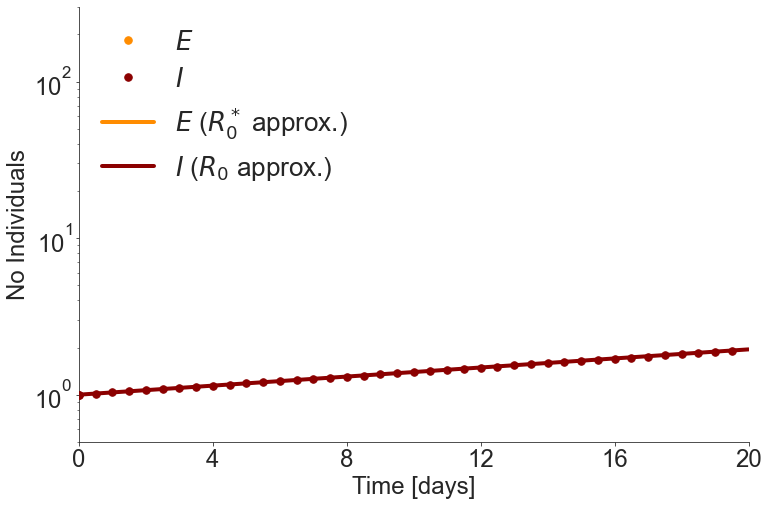

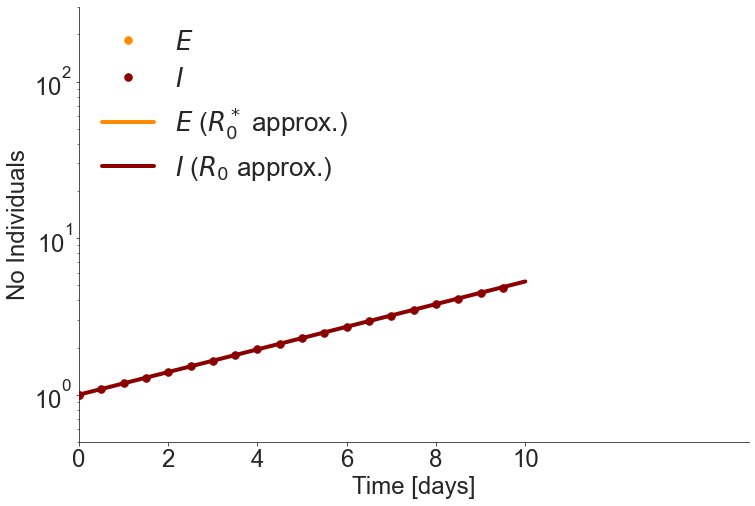

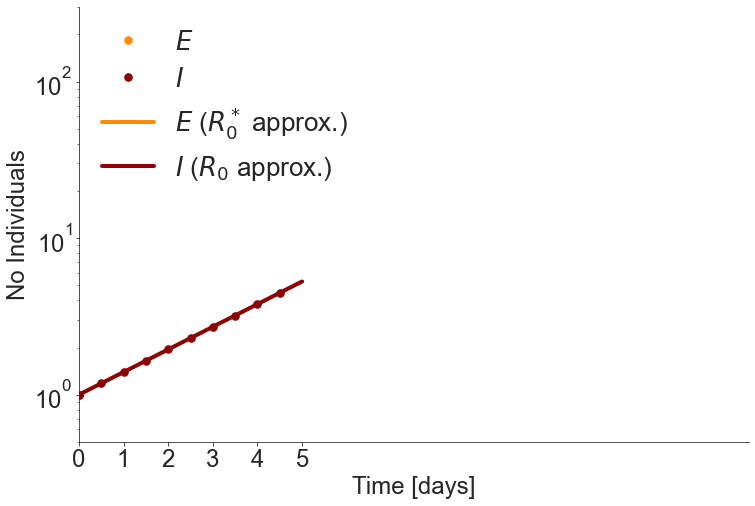

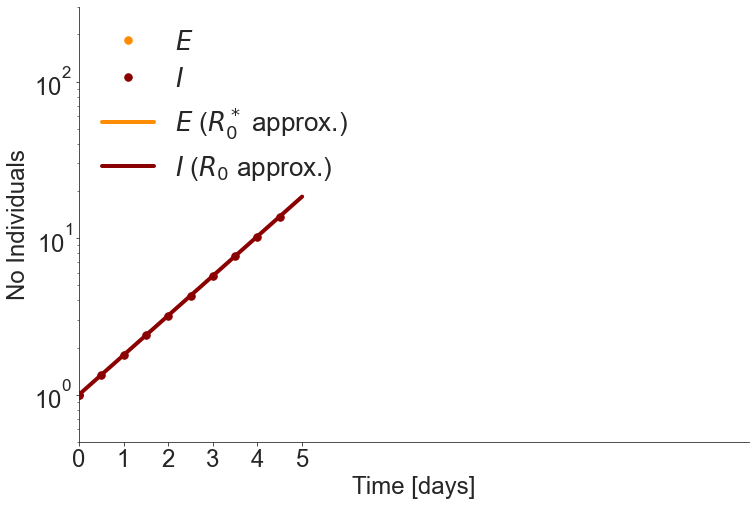

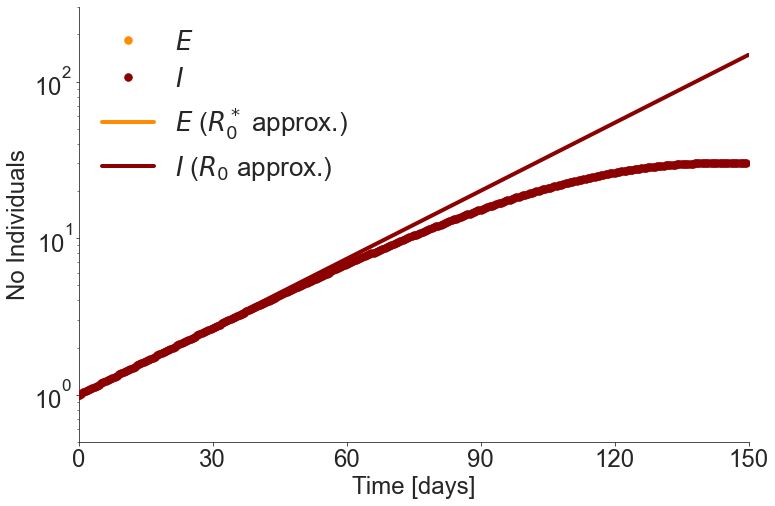

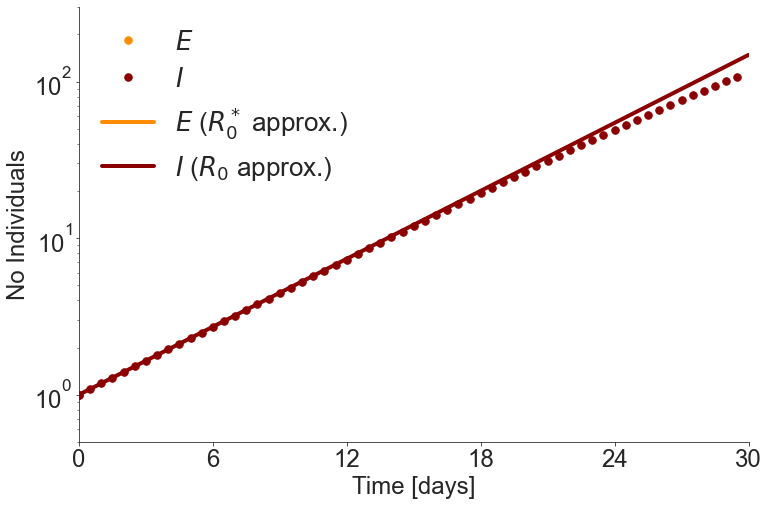

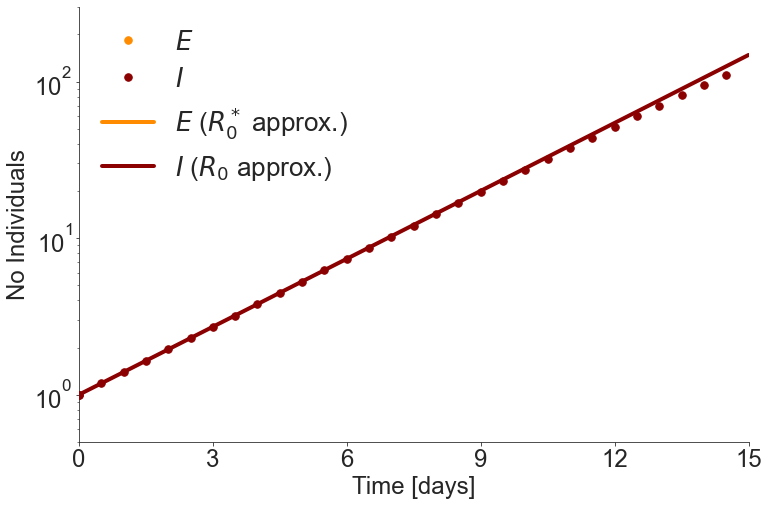

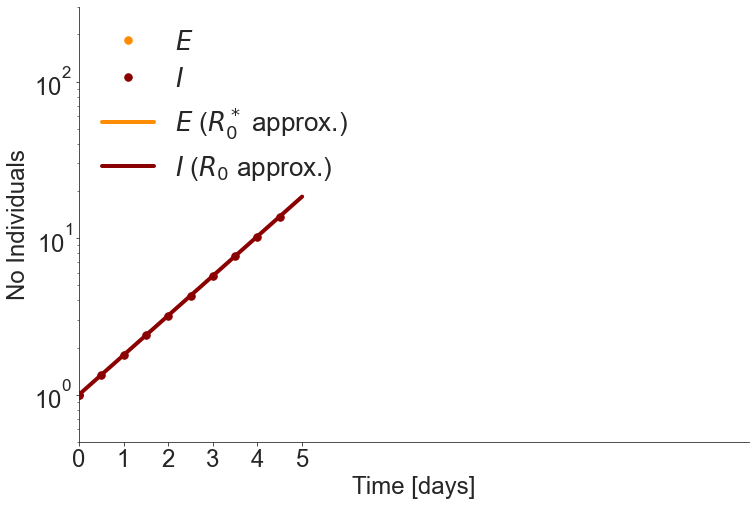

In [10]:
%%time
initI = 1
##Run over values of p
for p, Ts_total, betas in zip (ps, Ts_Total, Betas):
    ##Run over R0s
    for beta, T_total, slope, n_sim in zip (betas, Ts_total, slopes, n_sims):
        print('T:', T_total )
        print('p:',p)
        print('R0:', beta/gamma)
        if(aposteriori):
            print('slope:',slope)
        print('Succ nodes:')
        ### Generate new graph
        G = nx.barabasi_albert_graph(N, 2)
        ### run function 
        %time model_det = SEIRSModel(initN = N,beta=beta, sigma=sigma, gamma=gamma, theta_E=0, psi_E = 0, theta_I=0.0, psi_I =0.0, initI = initI, initD_E=0,sigma_D = 0, gamma_D = 0, mu_D = 0, mu_I=0, p = p)
        model_det.run(T=T_total, dt=0.5)

        ## Analytical Solution 
        lambda1, lambda2, time, E_solution, I_solution, sol_total_approx, I_max_2 = run_deterministic(N, beta, sigma, gamma, p, T_total, folder = Text_files_path+'Deterministic/')

        ## Plot
        fig, ax = model_det.figure_infections(ylim=20, xlim = 15, plot_R = False, plot_I = 'line', plot_E = 'line',
                                              plot_S = False, combine_D=False, plot_D_I='line',dashed_reference_results = False,
                                              plot_percentages=False, show = False)
        #ax.plot(time, sol_total_approx, 'k-', label = r'$E+I$ ($R_0^*$ approx.)', ms = 10, linewidth = 4)
        #ax.plot(time, E_solution+I_solution, 'k-', label = r'Total_I$_{approx}$', ms = 10, linewidth = 4)
        ax.plot(time, E_solution, '-', color = 'darkorange', label = r'$E$ ($R_0^*$ approx.)', ms = 10, linewidth = 4)
        ax.plot(time, I_solution, '-', color = 'darkred', label = r'$I$ ($R_0$ approx.)', ms = 10, linewidth = 4)
        my_plot_layout(ax = ax, xlabel='Time [days]', ylabel='No Individuals', yscale = 'log')
        ax.legend(loc = 2, fontsize = 26, frameon=False)
        ax.set_ylim(0.5,300)
        ax.set_xticks(time[::int(T_total/5)]);

<Figure size 432x288 with 0 Axes>

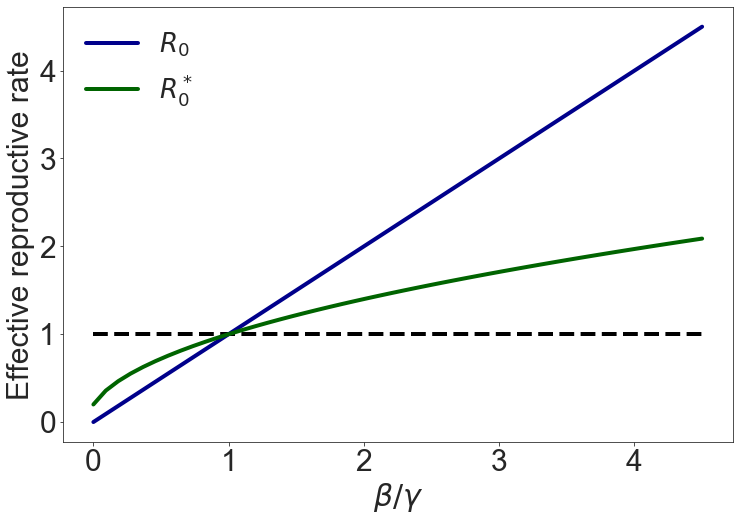

In [7]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(0, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, GT0, color='darkblue', label = '$R_0$', linewidth = 4)
ax.plot(beta/gamma, GT, color='darkgreen', label = '$R_0^*$', linewidth = 4)
ax.hlines(1,0,4.5, linestyles='dashed', linewidth = 4)
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'Effective reproductive rate', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/growth_rates.pdf')

<Figure size 432x288 with 0 Axes>

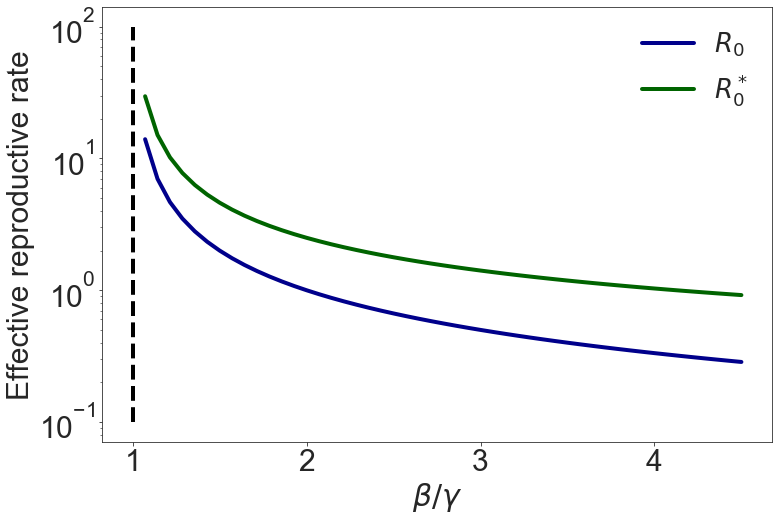

In [14]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(1, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, 1/(GT0-1), color='darkblue', label = '$R_0$', linewidth = 4)
ax.plot(beta/gamma, 1/(GT-1), color='darkgreen', label = '$R_0^*$', linewidth = 4)
ax.vlines(1,0.1,100, linestyles='dashed', linewidth = 4)
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'Effective reproductive rate', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.set_yscale('log')
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/establishment.pdf')

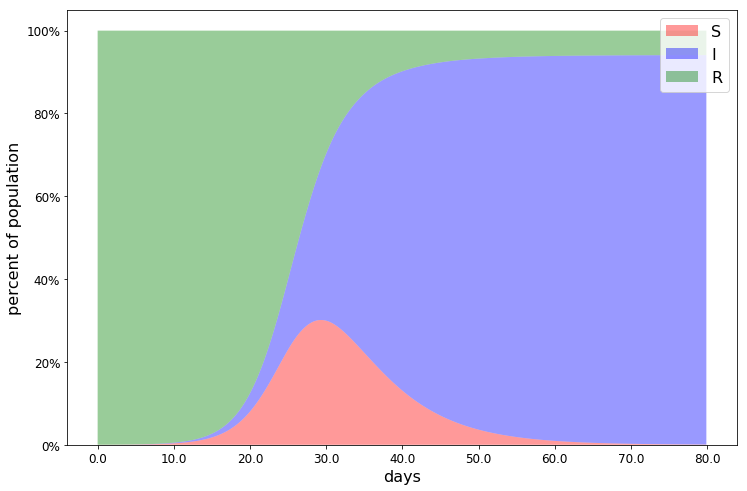

In [14]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_time = 80
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_time, dt= 0.1)
fig, ax = plt.subplots(figsize=(12,8))
ax.stackplot(t, np.array([n,R,S])/N,labels=['S','I', 'R'], colors = ['r', 'b', 'g'], alpha = 0.4)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()], size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel('days', fontsize = 16)
ax.set_ylabel('percent of population', fontsize = 16)
ax.legend(fontsize = 16)
fig.savefig('../Figures/Deterministic/example_epidemics.pdf')

In [17]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_total = 10 #use 25 for \beta = 1/4 and 10 for \beta = 1/2
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_total, dt= 0.1)
I_max = n[-1]
print(I_max)

26.924094496148268


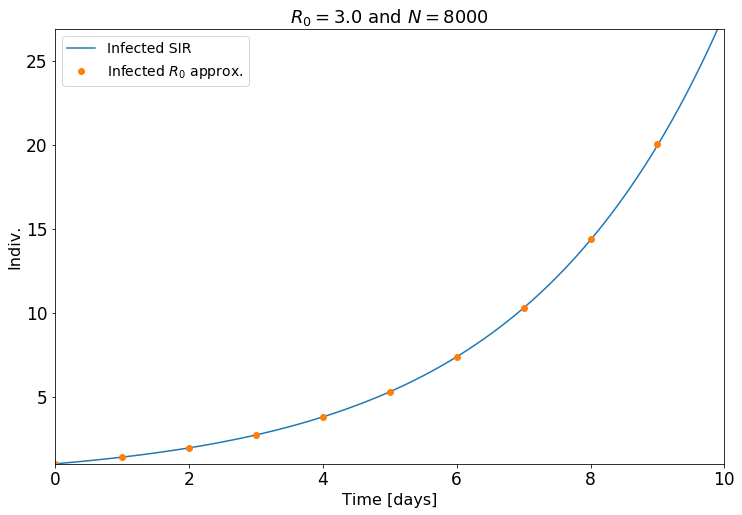

In [18]:
infec = np.array([1])
time_infec = np.array([0])
for i in range(int(T_total)):
    infec = np.append(infec,np.exp(((beta/gamma - 1)/6)*(i+1)))
    #time_infec = np.append(time_infec,time_infec[-1]+(6*np.log(2))/(2))
    time_infec = np.append(time_infec,time_infec[-1]+1)
fig, ax = plt.subplots(figsize=(12,8))
#ax.stackplot(t, [S,n,R],labels=['Susceptible','Infected', 'Recovered'])
#ax.plot(t, S, label = 'Susceptible')
ax.plot(t, n,'-', label='Infected SIR')
ax.plot(time_infec, infec,'.',ms = 12, label='Infected $R_0$ approx.')
ax.legend(fontsize=14)
ax.set_xlabel('Time [days]', fontsize = 16)
ax.set_ylabel('Indiv.', fontsize = 16)
ax.set_title(r'$R_0 = %.01f$ and $N = %.0f$'%(beta/gamma, N), fontsize = 18)
ax.tick_params(labelsize = 17)
plt.xlim(0,T_total)
plt.ylim(1,I_max)
#plt.yscale('log')
plt.savefig('../Figures/Deterministic/7_days_no_replacement/dynamics_R0%.1f_N%.0f.pdf'%(beta/gamma, N))

(<Figure size 864x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x181bf25cc0>)

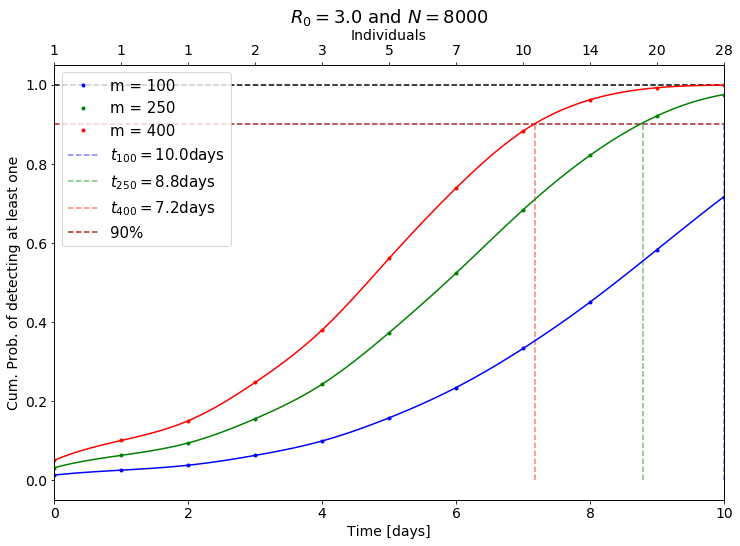

In [19]:
folder = '../Figures/Deterministic/7_days_no_replacement/'
sample_sizes = [100, 250, 400]
colors = ['b', 'g', 'r']
#plot_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)
plot_cum_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_cum_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)

In [25]:
a = 1